In [1]:
import json
from ipywidgets import interact
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
class Data:
    """
    Stateful class to store data and print information
    """
    year: int = None
    game_id: int = None
    play_id: int = None
    _data: dict = None

    def set(self, year, game_id, play_id):
        # only load large json data (>100MB) of needed
        if year != self.year:
            with open(f'../data/raw/{year}.json', 'r') as f:
                self._data = json.load(f)

        self.year = year
        self.game_id = game_id
        self.play_id = play_id

    def display(self):
        display(
            self._data[self.game_id]['liveData']['plays']['allPlays'][self.play_id]
        )

    def update_plot(self, fig: plt.figure, circle: plt.Circle):
        coords = self._data[self.game_id]['liveData']['plays']['allPlays'][self.play_id]['coordinates']
        if coords:
            circle.set(visible=True, center=(coords['x'], coords['y']))
        else:
            circle.set(visible=False)
        fig.canvas.draw()
        display.display(plt.gcf())

<IPython.core.display.Javascript object>


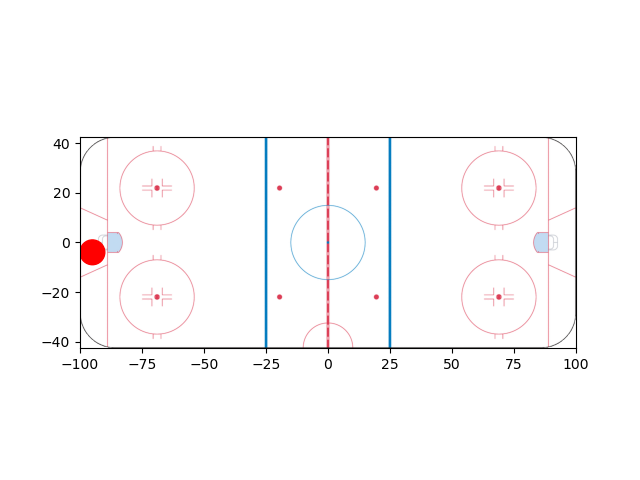

interactive(children=(Dropdown(description='year', options=(('2016-2017', 20162017), ('2017-2018', 20172018)),…

In [3]:
%matplotlib notebook
fig, ax = plt.subplots()

img_data = plt.imread('../blog/figures/nhl_rink.png')
img = plt.imshow(img_data, extent=[-100,100,-42.5,42.5])

circle = plt.Circle((0,0), 5, color='r')
ax.add_patch(circle)

data = Data()

@interact(
    year=[("2016-2017", 20162017), ("2017-2018", 20172018)],
    game_id=(0,1200),
    play_id=(0,500),
)
def plot(year, game_id, play_id):
    data.set(year, game_id, play_id)
    data.display()
    data.update_plot(fig, circle)